In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import pickle
from collections import Counter

In [ ]:
def imshow(data, title):
    index = []
    count = []
    for key, val in sorted(data.items()):
        index.append(key)
        count.append(val)
    count = np.array(count)
    s = len(index)

    plt.figure(figsize=(20, 6))
    ax = sns.barplot(x=index, y=count, palette=['#FEA443', '#F3FEB0', '#F2EDD0'], order=sorted(index))

    plt.xticks(np.arange(s), index)
    plt.title(title + ' : ' + str(count.sum()), fontsize=16)
    plt.xlabel('')
    plt.ylabel('Number of Answer', fontsize=12)

#     counts_pct = [f'{elem * 100:.2f}%' for elem in count / count.sum()]
    counts_pct = [f'{elem}' for elem in count]
    for i, v in enumerate(counts_pct):
        ax.text(i, 0, v, horizontalalignment='center', size=12, color='black', fontweight='bold')

    plt.show()

In [ ]:
def imshow_v2(label_pred):
    fig = plt.figure(figsize=(30, 50))
    for i, (label, preds) in enumerate(label_pred.items()):
        data = Counter(preds)
        index = []
        count = []
        for key, val in sorted(data.items()):
            index.append(key)
            count.append(val)
        count = np.array(count)
        s = len(index)
        
        ax = fig.add_subplot(9, 2, i+1)
        sns.barplot(x=index, y=count, palette=['#FEA443', '#F3FEB0', '#F2EDD0'])
        ax.set_title(f'label({label}) - {sum(count)}')
        ax.set_xlabel('pred', fontsize=12)
        
        counts_pct = [f'{elem}' for elem in count]
        for i, v in enumerate(counts_pct):
            ax.text(i, 0, v, horizontalalignment='center', size=12, color='black', fontweight='bold')
        
        counts_pct = [f'{elem}' for elem in count]

In [324]:
name = 'all_effi_b3_sgd4'
path = os.path.join('/opt/ml/eval', f'{name}_wrong.pickle')
with open(path, 'rb') as fr:
    wrong_answer = pickle.load(fr)
    
path = os.path.join('/opt/ml/eval', f'{name}_all.pickle')
with open(path, 'rb') as fr:
    all_answer = pickle.load(fr)

path = os.path.join('/opt/ml/eval', f'{name}_label_pred.pickle')
with open(path, 'rb') as fr:
    label_pred = pickle.load(fr)


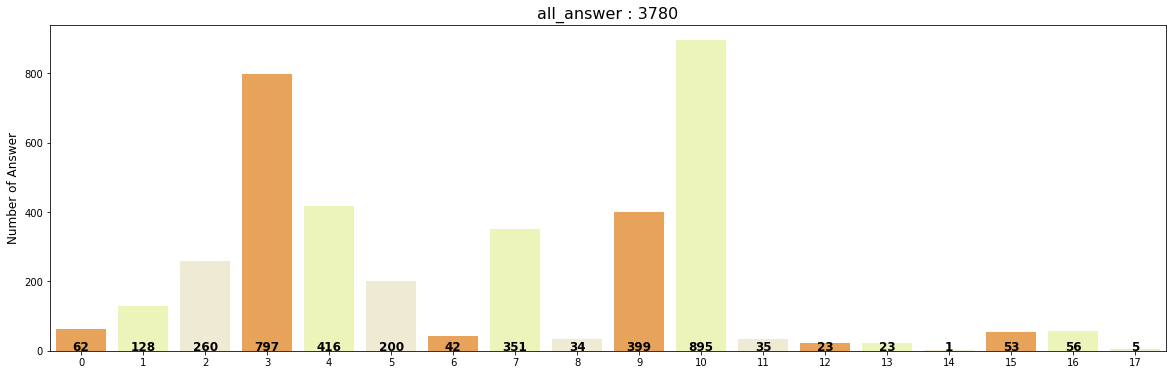

In [326]:
imshow(all_answer, 'all_answer')

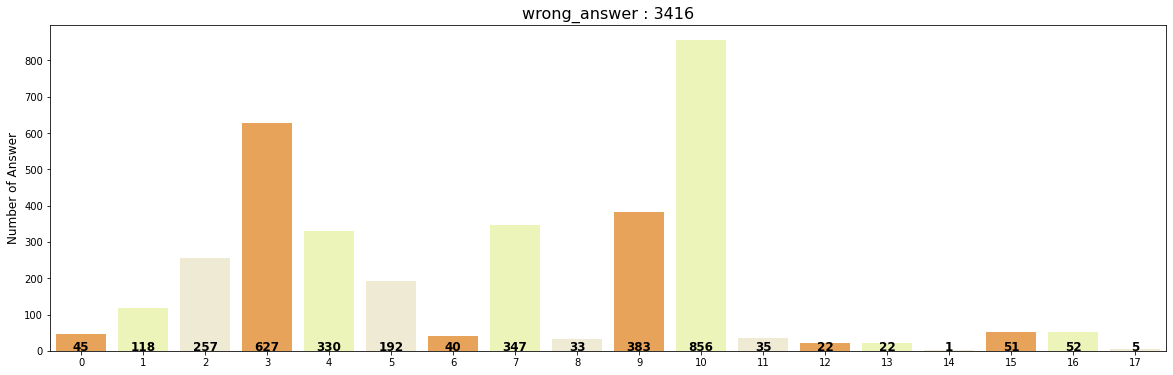

In [327]:
imshow(wrong_answer, 'wrong_answer')

- 잘못 예측한 번호에 대해 몇 번으로 예측했는지

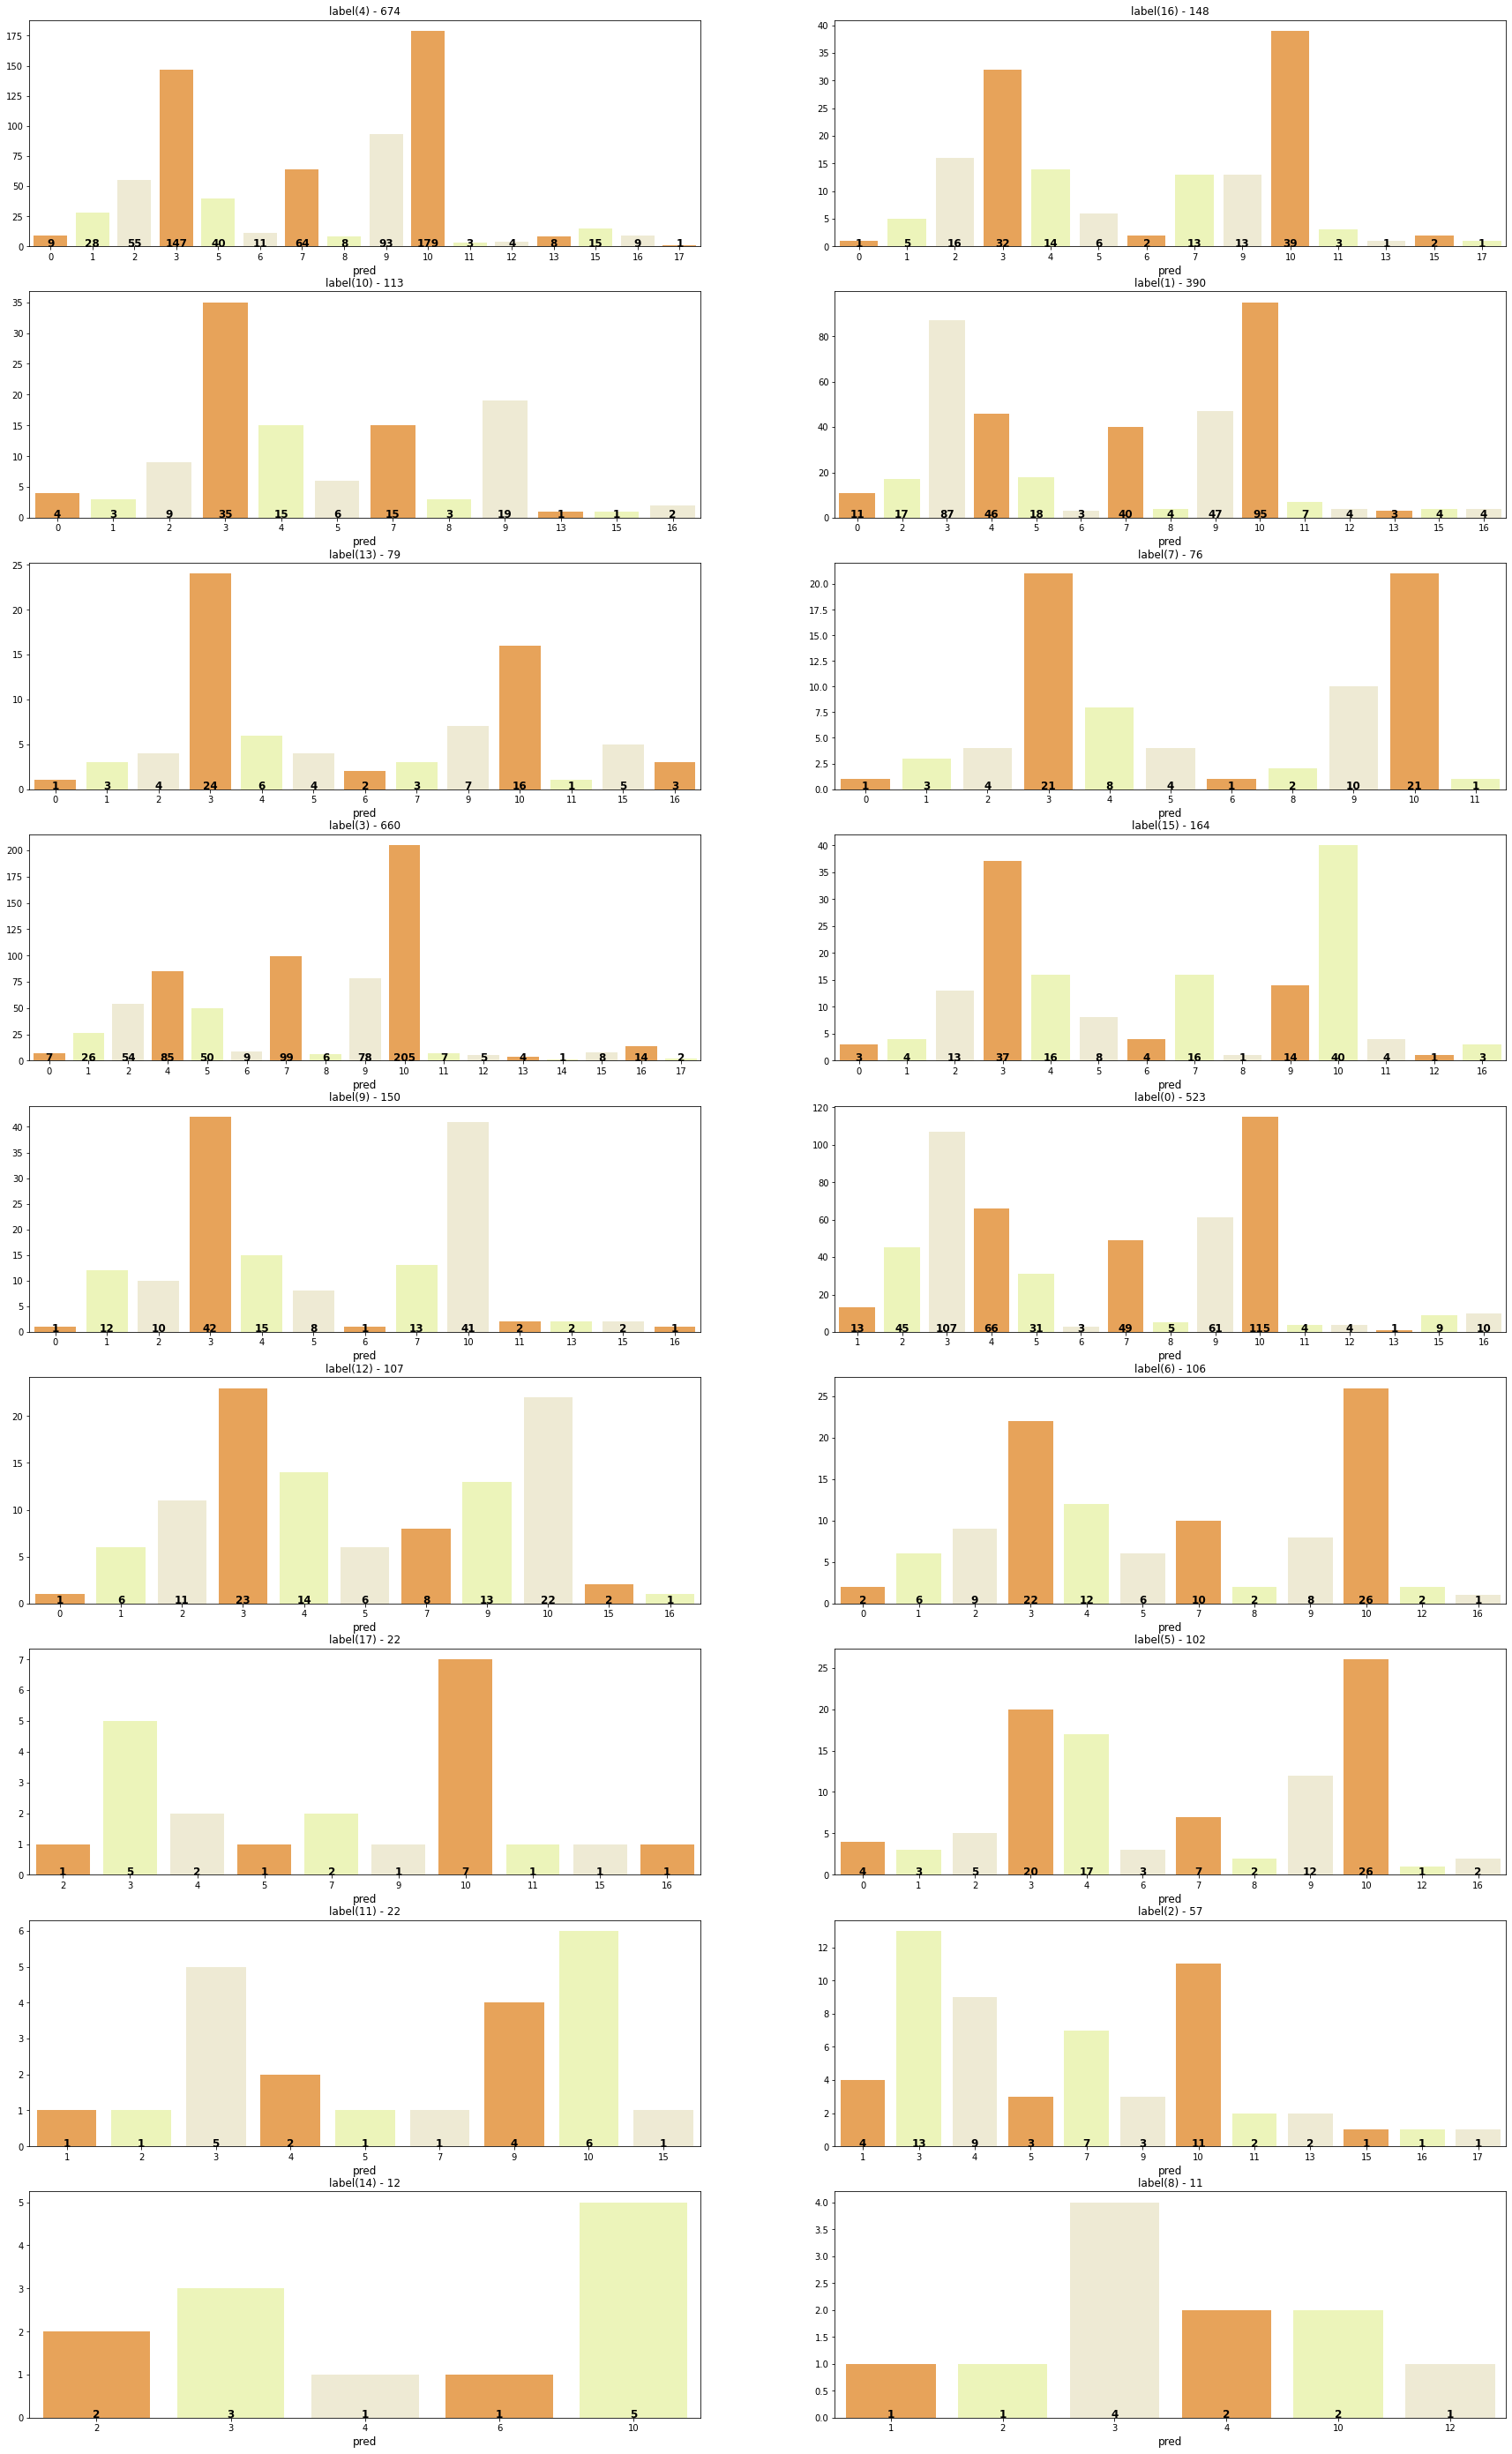

In [328]:
imshow_v2(label_pred)